<a href="https://colab.research.google.com/github/abrahamrichardbudul/Machine-Learning-and-Visualization-for-Data-/blob/main/ML_in_Real_Estate_Market_Analysis_and_Investment_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install & Import Libraries**

**Load the Dataset**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Step 1: Load and Initial Data Cleaning
# Load the dataset
df = pd.read_csv('AmesHousing.csv')

# Drop irrelevant columns (e.g., Order, PID)
df = df.drop(['Order', 'PID'], axis=1, errors='ignore')

# Standardize column names (remove spaces and slashes)
df.columns = df.columns.str.strip().str.replace(' ', '').str.replace('/', '_')

# Drop rows with missing SalePrice
print(f"Rows before: {df.shape[0]}")
df = df[df['SalePrice'].notnull()]
print(f"Rows after: {df.shape[0]}")

Rows before: 2930
Rows after: 2930


**Handle Missing Values**

In [ ]:
# Step 2: Handle Missing Values
# Numerical columns imputation with median
numerical_cols = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'GrLivArea', 'YearBuilt',
                  'GarageCars', 'TotalBsmtSF', 'FullBath', 'LotArea']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# Categorical columns imputation with 'None'
categorical_cols = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu']
for col in categorical_cols:
    df[col] = df[col].fillna('None')

In [ ]:
print(df.columns.tolist())


['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch

**Generate Feature Correlation Heatmap**

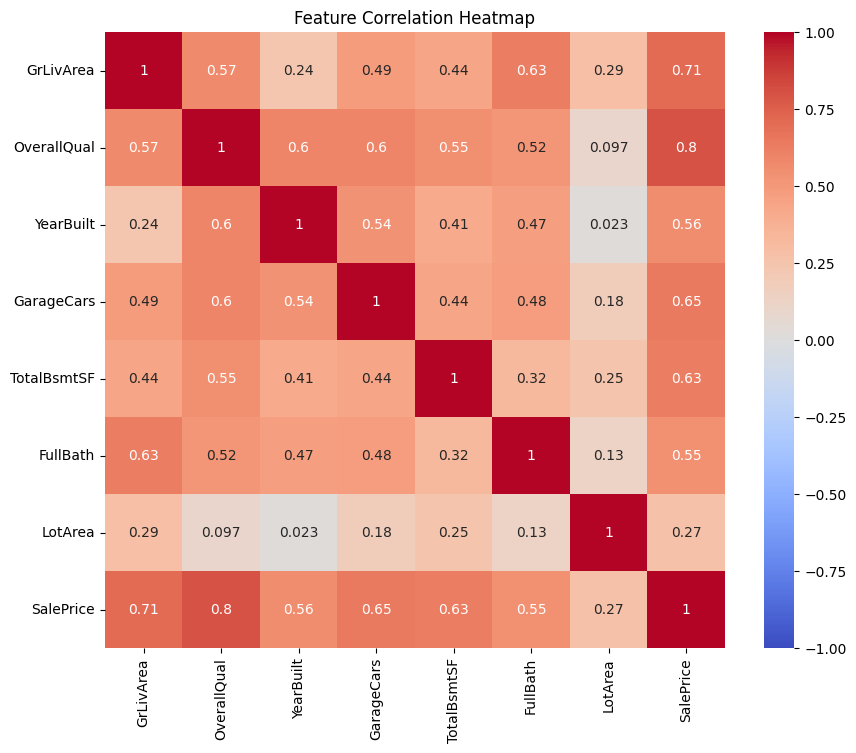

In [ ]:
# Step 3: Generate Feature Correlation Heatmap
# Select initial features for correlation analysis
initial_features = ['GrLivArea', 'OverallQual', 'YearBuilt', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'LotArea', 'SalePrice']
correlation_data = df[initial_features]

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

**Select and Prepare Features**

In [ ]:
# Step 4: Select and Prepare Features
# Initial feature set based on EDA and heatmap
initial_features = ['GrLivArea', 'OverallQual', 'YearBuilt', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'LotArea']
X = df[initial_features]
y = df['SalePrice']

# Validate with RFE
model = RandomForestRegressor(random_state=42)
rfe = RFE(model, n_features_to_select=7)
rfe.fit(X, y)
selected_features = X.columns[rfe.support_]
print("RFE Selected Features:", selected_features)
X = X[selected_features]

RFE Selected Features: Index(['GrLivArea', 'OverallQual', 'YearBuilt', 'GarageCars', 'TotalBsmtSF',
       'FullBath', 'LotArea'],
      dtype='object')


**Train and Evaluate Models**

In [ ]:
# Step 5: Train and Evaluate Models
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)  # MSE
rmse_lr = np.sqrt(mse_lr)  # Manually calculate RMSE
print("Linear Regression - R²: {:.3f}, MAE: {:.2f}, RMSE: {:.2f}".format(
    r2_score(y_test, y_pred_lr),
    mean_absolute_error(y_test, y_pred_lr),
    rmse_lr))

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)  # MSE
rmse_rf = np.sqrt(mse_rf)  # Manually calculate RMSE
print("Random Forest - R²: {:.3f}, MAE: {:.2f}, RMSE: {:.2f}".format(
    r2_score(y_test, y_pred_rf),
    mean_absolute_error(y_test, y_pred_rf),
    rmse_rf))

Linear Regression - R²: 0.801, MAE: 25129.16, RMSE: 39922.66
Random Forest - R²: 0.872, MAE: 18474.62, RMSE: 32019.81


**Clustering Analysis**

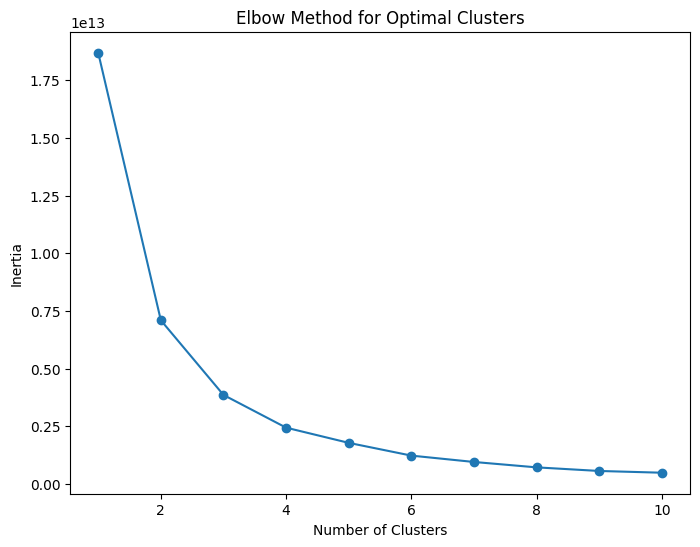

Cluster Summary:
              SalePrice    GrLivArea  Cluster
Cluster                                     
0        218794.801802  1737.146146      999
1        374449.267490  2273.847737      243
2        130429.666469  1247.712678     1688


In [ ]:
# Step 6: Clustering Analysis
# Perform K-means clustering
X_cluster = df[['SalePrice', 'GrLivArea']]
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertias.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Fit with 3 clusters (based on Elbow plot)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_cluster)
cluster_summary = df.groupby('Cluster').agg({'SalePrice': 'mean', 'GrLivArea': 'mean', 'Cluster': 'count'})
print("Cluster Summary:\n", cluster_summary)

**Identify Undervalued Properties**

In [ ]:
# Step 7: Identify Undervalued Properties
# Predict on test set and mark undervalued properties
df_test = df.iloc[X_test.index].copy()
df_test['Predicted_Price'] = rf_model.predict(X_test)
df_test['Undervalued'] = (df_test['Predicted_Price'] > df_test['SalePrice']) & \
                        ((df_test['Predicted_Price'] - df_test['SalePrice']) / df_test['SalePrice'] > 0.1)
undervalued_properties = df_test[df_test['Undervalued']]
print("Undervalued Properties:\n", undervalued_properties[['SalePrice', 'Predicted_Price', 'Neighborhood', 'Cluster']])

Undervalued Properties:
       SalePrice  Predicted_Price Neighborhood  Cluster
1357     161000        190536.78      OldTown        2
650       95000        113393.64      OldTown        2
1894     147000        163315.38        NAmes        2
1393     140000        159413.06       Sawyer        2
2779     192500        217277.10      CollgCr        0
...         ...              ...          ...      ...
2841      83000        110770.23      Edwards        2
942       85000        109642.15       IDOTRR        2
2098     250000        276935.32      CollgCr        0
2653      61500         71469.97      OldTown        2
462      173000        194516.55      NridgHt        2

[117 rows x 4 columns]


**Tableau Process Csv file**

In [ ]:
# Save processed dataset
df.to_csv('ames_processed_data.csv', index=False)
print("Data exported to ames_processed_data.csv")

Data exported to ames_processed_data.csv


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load your processed data
df = pd.read_csv('ames_processed_data.csv')

# Select features and target
features = ['GrLivArea', 'OverallQual', 'YearBuilt', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'LotArea']
X = df[features]
y = df['SalePrice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on full dataset
df['Predicted_Price'] = rf_model.predict(X)

# Flag undervalued properties (>10% difference)
df['Undervalued'] = (df['Predicted_Price'] > df['SalePrice'] * 1.10).astype(int)

# Save updated dataset
df.to_csv('ames_processed_data (1).csv', index=False)
print("Updated dataset with Predicted_Price and Undervalued saved.")

Updated dataset with Predicted_Price and Undervalued saved.
